### 🔑 **Explicação do Código:**

1. **Tratamento de Valores Ausentes:**
    - Variáveis numéricas: Substituídas pela mediana.
    - Variáveis categóricas: Substituídas por `'Desconhecido'`.
2. **Transformação de Variáveis Categóricas:**
    - Usamos **One-Hot Encoding** para converter variáveis categóricas em valores numéricos.
3. **Normalização (Opcional):**
    - Aplicamos `StandardScaler` para padronizar variáveis contínuas.
4. **Treinamento do Modelo:**
    - Usamos um `RandomForestRegressor` para identificar a importância de cada variável.
5. **Visualização das Features Mais Importantes:**
    - Exibimos o top 20 das variáveis mais importantes para o preço de venda.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Identificador do Imóvel            1460 non-null   int64  
 1   Classe do Edifício                 1460 non-null   int64  
 2   Zoneamento                         1460 non-null   object 
 3   Frente do Lote                     1201 non-null   float64
 4   Área Total do Lote                 1460 non-null   int64  
 5   Tipo de Rua                        1460 non-null   object 
 6   Tipo de Viela                      1460 non-null   object 
 7   Formato do Lote                    1460 non-null   object 
 8   Nivelamento do Terreno             1460 non-null   object 
 9   Tipo de Utilidades                 1460 non-null   object 
 10  Configuração do Lote               1460 non-null   object 
 11  Inclinação do Terreno              1460 non-null   objec

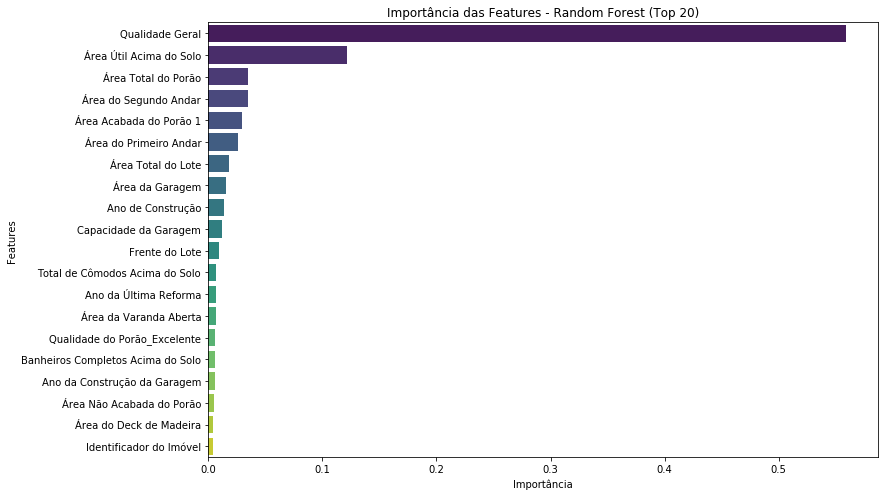

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo Excel
train_df = pd.read_excel('train_df_transform.xlsx')

# Exibir informações gerais sobre o DataFrame
print(train_df.info())

# 🔍 1. Tratamento de Valores Ausentes (Missing Values)
# Substituir valores ausentes em variáveis numéricas por a mediana
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numerical_columns] = train_df[numerical_columns].fillna(train_df[numerical_columns].median())

# Substituir valores ausentes em variáveis categóricas por 'Desconhecido'
categorical_columns = train_df.select_dtypes(include=['object']).columns
train_df[categorical_columns] = train_df[categorical_columns].fillna('Desconhecido')

# 🔍 2. Transformação de Variáveis Categóricas
# Aplicar One-Hot Encoding para todas as variáveis categóricas
train_df_encoded = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

# 🔍 3. Normalização de Variáveis Numéricas (Opcional)
scaler = StandardScaler()
train_df_encoded[numerical_columns] = scaler.fit_transform(train_df_encoded[numerical_columns])

# 🔍 4. Separar as Features (X) da Variável Alvo (y)
y = train_df_encoded['Preço de Venda']  # Substitua pelo nome exato da coluna de preço
X = train_df_encoded.drop(['Preço de Venda'], axis=1)

# 🔍 5. Dividir os Dados em Conjuntos de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 6. Treinamento do Modelo Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔍 7. Importância das Features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotar a Importância das Features
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices][:20], y=[X.columns[i] for i in indices][:20], palette='viridis')
plt.title('Importância das Features - Random Forest (Top 20)')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()